In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load data
df = pd.read_csv('data.csv')

# Basic EDA

In [ ]:

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
display(df.head())

Shape: (669, 8)

Columns: ['PropertyName', 'BHK', 'Location', 'Area', 'ListingPrice', 'FurnishStatus', 'City', 'Description']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PropertyName   669 non-null    object 
 1   BHK            669 non-null    int64  
 2   Location       669 non-null    object 
 3   Area           669 non-null    int64  
 4   ListingPrice   669 non-null    float64
 5   FurnishStatus  669 non-null    object 
 6   City           669 non-null    object 
 7   Description    669 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 41.9+ KB
None

Missing values:
 PropertyName     0
BHK              0
Location         0
Area             0
ListingPrice     0
FurnishStatus    0
City             0
Description      0
dtype: int64


,PropertyName,BHK,Location,Area,ListingPrice,FurnishStatus,City,Description
0,Naiknavare Gardenia Society Phase 1,2,Wadgaon Sheri,900,40000.0,Furnished,Pune,Welcome to a comfortable and convenient lifest...
1,Lunkad Amazon,2,Viman Nagar,1160,49000.0,Furnished,Pune,"A furnished 2-bedroom, 2-bathroom Flats in Pun..."
2,Goel Ganga Nebula,2,Viman Nagar,1150,52000.0,Furnished,Pune,"For a rent of 52 thousand, you will find a bea..."
3,Avon Vista,3,Balewadi,1210,45000.0,Unfurnished,Pune,Find your next comfortable home in Pune Balewa...
4,VTP Aethereus,2,Mahalunge,650,29099.0,Furnished,Pune,A peaceful life in Pune is within your reach w...


# 1. What is the distribution of listing prices?

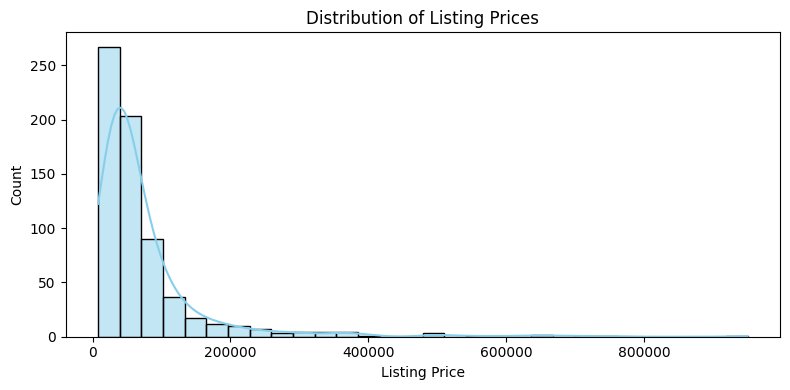

In [ ]:

plt.figure(figsize=(8,4))
sns.histplot(df['ListingPrice'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Listing Prices')
plt.xlabel('Listing Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Which cities have the most listings?


Number of Listings by City:


,City,Count
0,Pune,336
1,Mumbai,333


C:\Users\jayes\AppData\Local\Temp\ipykernel_6664\3114173875.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts, x='City', y='Count', palette='viridis')


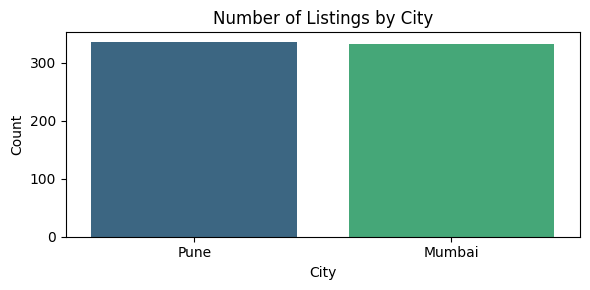

In [ ]:

city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']
print("Number of Listings by City:")
display(city_counts)
plt.figure(figsize=(6,3))
sns.barplot(data=city_counts, x='City', y='Count', palette='viridis')
plt.title('Number of Listings by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. What is the average price per city?

Average Listing Price by City:


,City,ListingPrice
0,Mumbai,112733.330330
1,Pune,37478.595238


C:\Users\jayes\AppData\Local\Temp\ipykernel_6664\3629238892.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_city, x='City', y='ListingPrice', palette='mako')


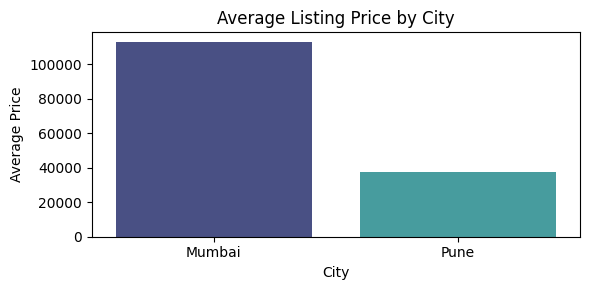

In [ ]:

avg_price_city = df.groupby('City')['ListingPrice'].mean().reset_index()
print("Average Listing Price by City:")
display(avg_price_city)
plt.figure(figsize=(6,3))
sns.barplot(data=avg_price_city, x='City', y='ListingPrice', palette='mako')
plt.title('Average Listing Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


# 4. What is the distribution of BHKs?


Number of Listings by BHK:


,BHK,Count
0,2,375
1,3,149
2,1,120
3,4,23
4,5,2


C:\Users\jayes\AppData\Local\Temp\ipykernel_6664\1139440717.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bhk_counts, x='BHK', y='Count', palette='crest')


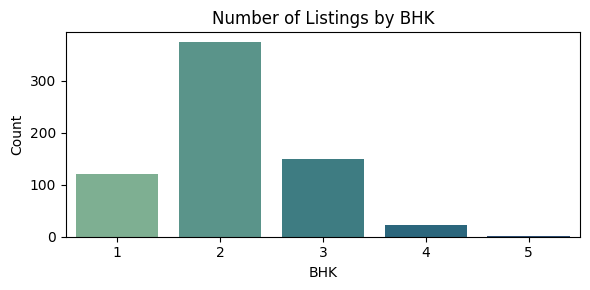

In [ ]:

bhk_counts = df['BHK'].value_counts().reset_index()
bhk_counts.columns = ['BHK', 'Count']
print("Number of Listings by BHK:")
display(bhk_counts)
plt.figure(figsize=(6,3))
sns.barplot(data=bhk_counts, x='BHK', y='Count', palette='crest')
plt.title('Number of Listings by BHK')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 5. How does price vary by furnishing status?

C:\Users\jayes\AppData\Local\Temp\ipykernel_6664\1062004754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FurnishStatus', y='ListingPrice', palette='Set2')


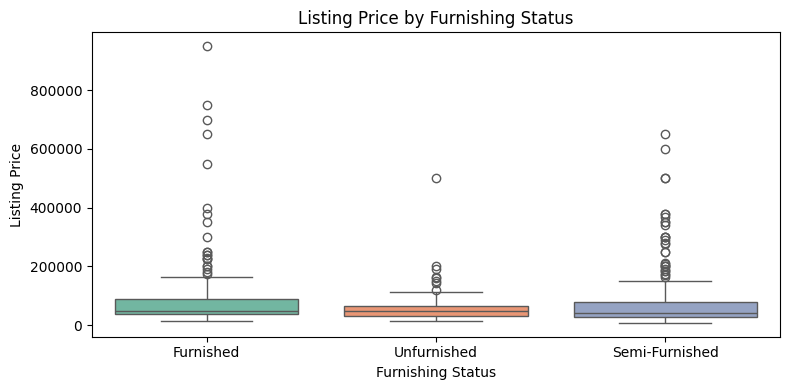

In [ ]:

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='FurnishStatus', y='ListingPrice', palette='Set2')
plt.title('Listing Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Listing Price')
plt.tight_layout()
plt.show()

# 6. What are the top locations with most listings?

Top 10 Locations by Number of Listings:


,Location,Count
0,Kharadi,35
1,Powai,33
2,Hinjewadi,30
3,Andheri West,25
4,Malad West,25
5,Goregaon East,22
6,Hadapsar,17
7,Andheri East,17
8,Wakad,17
9,Baner,16


C:\Users\jayes\AppData\Local\Temp\ipykernel_6664\2275562664.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts, x='Count', y='Location', palette='flare')


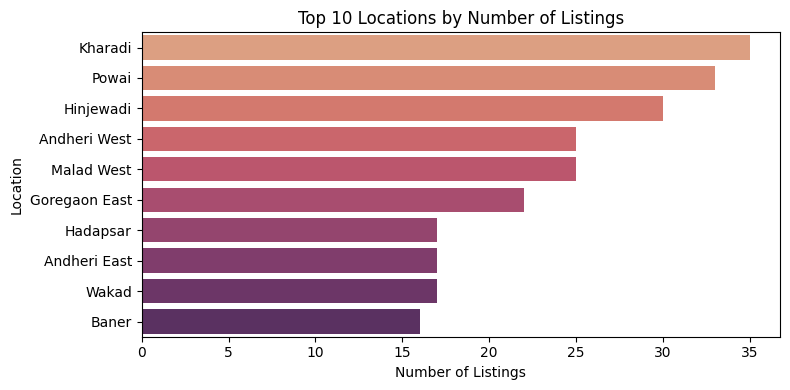

In [ ]:

location_counts = df['Location'].value_counts().head(10).reset_index()
location_counts.columns = ['Location', 'Count']
print("Top 10 Locations by Number of Listings:")
display(location_counts)
plt.figure(figsize=(8,4))
sns.barplot(data=location_counts, x='Count', y='Location', palette='flare')
plt.title('Top 10 Locations by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

# 7. How does price per sq ft change according to location?

In [ ]:

df['PricePerSqFt'] = df['ListingPrice'] / df['Area']

# 8.Table: Average price per sq ft by location (top 10 locations)


In [ ]:

avg_price_sqft_location = df.groupby('Location')['PricePerSqFt'].mean().reset_index().sort_values('PricePerSqFt', ascending=False).head(10)
print("Average Price Per Sq Ft by Location (Top 10):")
display(avg_price_sqft_location)

Average Price Per Sq Ft by Location (Top 10):


,Location,PricePerSqFt
122,Prabhat Road,555.555556
70,Khar West,240.000000
87,Mahalaxmi,222.972973
153,Vasant Vihar,222.222222
33,Colaba,211.111111
168,Worli,209.530606
10,Bandra West,185.719029
137,Santacruz West,177.726037
37,Dhabholkar Wadi,168.986083
110,Parel,166.831546


# 9.Plot: Average price per sq ft by location

C:\Users\jayes\AppData\Local\Temp\ipykernel_6664\1238586559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_sqft_location, x='PricePerSqFt', y='Location', palette='mako')


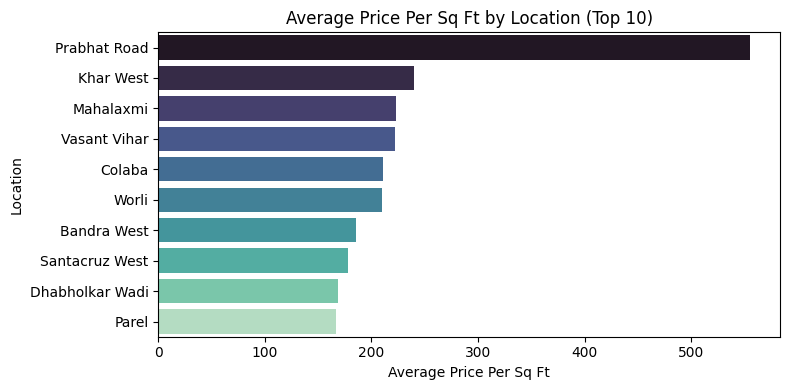

In [ ]:

plt.figure(figsize=(8,4))
sns.barplot(data=avg_price_sqft_location, x='PricePerSqFt', y='Location', palette='mako')
plt.title('Average Price Per Sq Ft by Location (Top 10)')
plt.xlabel('Average Price Per Sq Ft')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

# 10.City-wise average price per sq ft

In [ ]:

avg_price_sqft_city = df.groupby('City')['PricePerSqFt'].mean().reset_index().sort_values('PricePerSqFt', ascending=False)
print("Average Price Per Sq Ft by City:")
display(avg_price_sqft_city)

Average Price Per Sq Ft by City:


,City,PricePerSqFt
0,Mumbai,109.261253
1,Pune,38.513454


# 11.Plot: Average price per sq ft by city

C:\Users\jayes\AppData\Local\Temp\ipykernel_6664\238303338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_sqft_city, x='City', y='PricePerSqFt', palette='viridis')


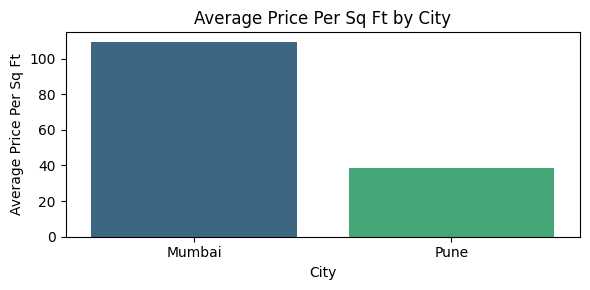

In [ ]:

plt.figure(figsize=(6,3))
sns.barplot(data=avg_price_sqft_city, x='City', y='PricePerSqFt', palette='viridis')
plt.title('Average Price Per Sq Ft by City')
plt.xlabel('City')
plt.ylabel('Average Price Per Sq Ft')
plt.tight_layout()
plt.show()

# 12.Top locations in Pune

Top 10 Locations in Pune by Number of Listings:


,Location,Count
0,Kharadi,35
1,Hinjewadi,30
2,Hadapsar,17
3,Wakad,17
4,Baner,16
5,Viman Nagar,15
6,Ravet,13
7,Wadgaon Sheri,12
8,Mahalunge,9
9,Mohammadwadi,8


C:\Users\jayes\AppData\Local\Temp\ipykernel_6664\1490936126.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pune_locations, x='Count', y='Location', palette='crest')


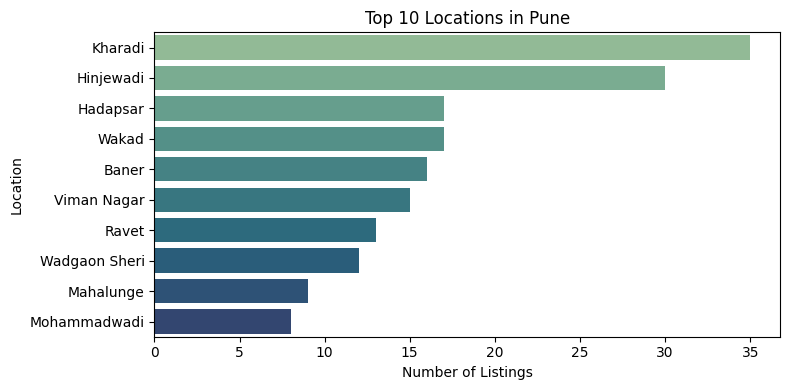

In [ ]:

pune_locations = df[df['City'] == 'Pune']['Location'].value_counts().head(10).reset_index()
pune_locations.columns = ['Location', 'Count']
print("Top 10 Locations in Pune by Number of Listings:")
display(pune_locations)
plt.figure(figsize=(8,4))
sns.barplot(data=pune_locations, x='Count', y='Location', palette='crest')
plt.title('Top 10 Locations in Pune')
plt.xlabel('Number of Listings')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

# 13.Top locations in Mumbai

Top 10 Locations in Mumbai by Number of Listings:


,Location,Count
0,Powai,33
1,Andheri West,25
2,Malad West,25
3,Goregaon East,22
4,Andheri East,17
5,Goregaon West,14
6,Worli,13
7,Malad East,12
8,Chandivali,11
9,Kandivali West,11


C:\Users\jayes\AppData\Local\Temp\ipykernel_6664\2987855494.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mumbai_locations, x='Count', y='Location', palette='flare')


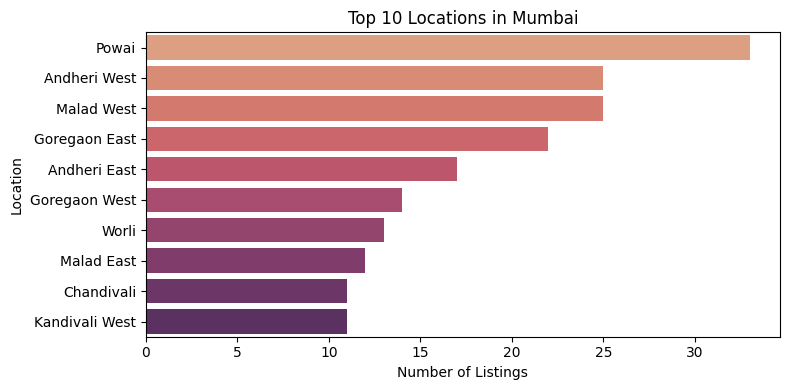

In [ ]:

mumbai_locations = df[df['City'] == 'Mumbai']['Location'].value_counts().head(10).reset_index()
mumbai_locations.columns = ['Location', 'Count']
print("Top 10 Locations in Mumbai by Number of Listings:")
display(mumbai_locations)
plt.figure(figsize=(8,4))
sns.barplot(data=mumbai_locations, x='Count', y='Location', palette='flare')
plt.title('Top 10 Locations in Mumbai')
plt.xlabel('Number of Listings')
plt.ylabel('Location')
plt.tight_layout()
plt.show()